Introducción a la Teoría de Control
=====
Con Matlab
========

##### Version 0.1

`Contenido Original creado por Ezequiel Leonardo Castaño`

<font color='Firebrick'>Este contenido está en <b>borrador</b> y puede estar incompleto y/o sufrir modificaciones</font>
___

El repositorio completo está disponible en Github como [Control Theory With Matlab](https://github.com/ELC/control-theory-with-matlab)

Los demás capítulos pueden encontrarse en el [homepage](https://elc.github.io/control-theory-with-matlab). 

Ante dudas y sugerencias, no dudes en utilizar los [Github Issues](https://github.com/ELC/control-theory-with-matlab/issues)

In [ ]:
%plot inline --format=png -w 1600 -h 500

In [2]:
format compact;

# Función de Transferencia

# Análisis de un sistema

Un sistema de primer orden es aquel donde la ecuación diferencial en el dominio del tiempo sólo contiene derivadas de hasta primer orden. 

## Forma Estandar

La **forma estándar** de un sistema de primer orden está dada por la expresión

$$y^{\prime } (x)+p(x)y=q(x)$$

En control normalmente se utiliza como variable independiente al tiempo, por ende

$$y^{\prime } (t)+p(t)y=q(t)$$

## Función de Transferencia

Y un sistema de control representa como al introducir una determinada entrada, $x(t)$, se obtiene una determinada salida $y(t)$, esta relación entre entrada y salida se denomina **Función de Transferencia** y se suele denominar con la letra $G$.

La función de transferencia está definida tanto en el **dominio del tiempo** como en el plano $s$, en el dominio del tiempo es la **convolución** entre la entrada y la salida.

$$y(t)=x(t)*G(t)$$

La convolución está definida por

$$(f*g)=(g*f)=\int_{-\infty }^{\infty } f(\tau )\cdot g(t-\tau )d\tau$$

Sin embargo, debido a que tanto $x(t)$ como $y(t)$ están definidas implícitamente por ecuaciones diferenciales, el cálculo de la convolución resulta extremadamente complejo. Debido a esta dificultad, se utiliza la transformada de Laplace para convertir la convolución en una operación algebraica, quedando entonces

$$\mathcal{L}\lbrace y(t)\rbrace =\mathcal{L}\lbrace x(t)*G(t)\rbrace =X(s)\cdot G(s)=Y(s)$$

De esta manera, es posible calcular la función de transferencia como


$$Y(s)=X(s)\cdot G(s)$$

$$G(s)=\frac{Y(s)}{X(s)}$$

Si el sistema de control es LTI, es decir, es **lineal** e **invariante en el tiempo**, una vez hallada la función de transferencia, se puede calcular la salida para **cualquier entrada** $x(t)$. 

## Sistema LTI

Dada una función de entrada $X(t)$, una función de salida $Y(t)$ y una función de transferencia $G(t)$. Un sistema es LTI si y sólo si todas las siguientes propiedades se cumplen.

### Producto por una constante

La entrada por una constante produce la salida por la misma constante, dado

$$x(t)*G(t)=y(s)$$

Entonces

$$(a\cdot x(t))*G(t)=a\cdot y(t)$$

### Aditividad

La salida de la suma de entradas es igual a la suma de las salidas individuales, dado

$$\begin{array}{l}
x_1 (t)*G(t)&=&y_1 (t)\\
x_2 (t)*G(t)&=&y_2 (t)
\end{array}$$

Entonces

$$(x_1 (t)+x_2 (t))*G(t)=y_1 (t)+y_2 (t)$$

### Invariabilidad

El comportamiento del sistema no cambia a lo largo del tiempo, dado

$$x(t)*G(t)=y(s)$$

Entonces

$$x(t-\tau )*G(t)=y(t-\tau )$$

## Ceros y Polos

Debido a que $G(s)$ quedó definida como $\frac{Y(s)}{X(s)}$ y tanto el numerador como el denominador son transformadas de ecuaciones diferenciales, $G$ queda definida como un **cociente de polinomios**.

$$G(s)=\frac{a_0 s^m +a_1 s^{m-1} +...+a_{m-1} s+a_m }{b_0 s^n +b_1 s^{n-1} +...+b_{n-1} s+b_n }$$

Al factorizar numerador y denominador se puede expresar la función de transferencia como

$$G(s)=k\frac{(s+z_1 )(s+z_2 )...(s+z_{m-1} )(s+z_m )}{(s+p_1 )(s+p_2 )...(s+p_{n-1} )(s+p_n )}~,~k\in {\mathbb{R}}^+$$

Donde $k$ es una constante real positiva

Donde todos los valores $-z_1 ,-z_2 ,...-z_{m-1} ,-z_m$ son las **raices del numerador** y se conocen como **ceros del sistema** y cuando $s$ toma cualquiera de estos valores, la función de transferencia **tienede 0**, es decir

$$\lim_{s\to z} G(s)=0~\forall ~z\in \lbrace -z_1 ,-z_2 ,..-z_{m-1} ,-z_m \rbrace$$

Análogamente todos los valores $-p_1 ,-p_2 ,...-p_{n-1} ,-p_n$ son las **raices del denominador** y se conocen como **polos del sistema** y cuando $s$ toma cualquiera de estos valores, la función de transferencia **tiende a**$\infty$, es decir

$$\lim_{s\to p} G(s)=\infty ~\forall ~p\in \lbrace -p_1 ,-p_2 ,..-p_{n-1} ,-p_n \rbrace$$

Al denominador también se lo conoce como **ecuación característica** por lo tanto hablar de los **ceros o raices** de la **ecuación característica** hace referencia a los **polos del sistema**

Entonces toda función de transferencia $G$ queda totalmente definida mediante sus $m$ **ceros** y sus $n$ **polos**.

### Clasificación basada en cantidad de polos y ceros

Dada una función de transferencia $G$ con $m$ ceros y $n$ polos, se puede clasificar como:

* Estrictamente Propia si $n>m$
* Propia si $n\ge m$
* Bipropia si $n=m$
* Impropia si $n<m$

Cuando la función de transferencia representa un proceso físico, **nunca puede ser impropia**, es decir, el grado del numerador nunca superará al del denominador.

Esto es importante ya que, si bien en Matlab es posible definir funciones de transferencia impropias, herramientas de simulación como Simulink, no son capaces de simularlas

## Sistemas de primer orden

Al utilizarse sistemas de primer orden, si la función de transferencia es **propia**, entonces su forma está definida por

$$G=\frac{a\cdot s+b}{c\cdot s+d}~,~a,b,c,d\in \mathbb{R}$$

Esto es así ya que $Y(s)$no puede contener términos de grado mayor a $2$ ya que eso implicaría derivadas de grado $2$ o superior. Y si el sistema es propio, esto implica que el numerador no puede tener un grado mayor al denominador. 

Se tienen dos casos, cuando $G$ tiene un cero y cuando no tiene ningún cero

$$G=\frac{b}{s+\frac{d}{c}},~~~~G=\frac{s+\frac{b}{a}}{s+\frac{d}{c}}$$ 

La forma con un cero suele representarse como

$$G~~=~~k\frac{\frac{s}{z}+1}{\frac{s}{p}+1}~~=~~\frac{k\cdot p}{z}\cdot \frac{s+z}{s+p}$$

Y la forma sin cero suele representarse como: $G=k\frac{p}{s+p}$ o también $G=k\frac{1}{\frac{s}{p}+1}$

En este caso al valor $\frac{1}{p}$ se le conoce como **constante de tiempo** y se representa con $\tau$ quedando

$$G=k\frac{1}{\tau \cdot s+1}$$

## Funciones de transferencia en Matlab

En matlab existen diversas formas de declarar funciones de transferencia. Es importante destacar que a diferencia del módulo de procesamiento simbólico, al usar funciones de transferencia, no se realizan simplificaciones, para ilustrar este punto se utilizarán 2 polos y ceros idénticos que normalmente podrían simplificarse pero que Matlab en ningún momento lo hace.

**Declarando la variable compleja** $s$

Usando la variable compleja $s$ pueden especificarse las funciones de transferencia como cociente de polinomios, como polos y ceros o una combinación de ambos

In [3]:
s = tf("s");
sistema = ((s+2)*(s+1)) / ((s+2)*(s+1)*(s+1.5))           % Polos y Ceros


sistema =
 
        s^2 + 3 s + 2
  -------------------------
  s^3 + 4.5 s^2 + 6.5 s + 3
 
Continuous-time transfer function.




In [4]:
sistema = (s^2 + 3*s + 2) / (s^3 + 4.5*s^2 + 6.5*s + 3)   % Cociente de Polinomios


sistema =
 
        s^2 + 3 s + 2
  -------------------------
  s^3 + 4.5 s^2 + 6.5 s + 3
 
Continuous-time transfer function.




In [5]:
sistema = (s^2 + 3*s + 2) / ((s+2)*(s+1)*(s+1.5))         % Combinación


sistema =
 
        s^2 + 3 s + 2
  -------------------------
  s^3 + 4.5 s^2 + 6.5 s + 3
 
Continuous-time transfer function.




**Especificando los coeficientes del numerador y denominador**

Para utilizar sólamente los coeficientes del numerador y el denominador, se utiliza la función **``tf``**

In [6]:
sistema = tf([1 3 2], [1 4.5 6.5 3])


sistema =
 
        s^2 + 3 s + 2
  -------------------------
  s^3 + 4.5 s^2 + 6.5 s + 3
 
Continuous-time transfer function.




**Especificando los polos y ceros**

Para definir la función de transferencia con polos y ceros, se utiliza la función **``zpk``**, que además toma un tercer parámetro que es la ganancia

In [7]:
sistema = zpk([-2; -1], [-2, -1, -1.5], 1)


sistema =
 
      (s+2) (s+1)
  -------------------
  (s+2) (s+1.5) (s+1)
 
Continuous-time zero/pole/gain model.




## Ceros y polos de una función de transferencia

Independientemente de la forma en la que la función de transferencia haya sido creada, es posible obtener sus ceros y polos con las funciones **``zero``** y **``pole``**

In [8]:
ceros = zero(sistema);
polos = pole(sistema);
ceros, polos

ceros =
    -2
    -1
polos =
   -2.0000
   -1.0000
   -1.5000



## Convirtiendo entre polos/ceros y coeficientes

De ceros y polos a coeficientes usando **``zp2tf``**

In [9]:
ceros = [-2; -1];
polos = [-2, -1, -1.5];
sistema = zpk(ceros, polos, 1)


sistema =
 
      (s+2) (s+1)
  -------------------
  (s+2) (s+1.5) (s+1)
 
Continuous-time zero/pole/gain model.




In [10]:
[numerador, denominador] = zp2tf(ceros, polos, 1);
sistema = tf(numerador, denominador)


sistema =
 
        s^2 + 3 s + 2
  -------------------------
  s^3 + 4.5 s^2 + 6.5 s + 3
 
Continuous-time transfer function.




De cociente de polinomios a polos y ceros **``tf2zp``**

In [11]:
numerador = [1 3 2];
denominador = [1 4.5 6.5 3];
sistema = tf(numerador, denominador)


sistema =
 
        s^2 + 3 s + 2
  -------------------------
  s^3 + 4.5 s^2 + 6.5 s + 3
 
Continuous-time transfer function.




In [12]:
[polos, ceros, ganancia] = tf2zp(numerador, denominador);
sistema = zpk(polos, ceros, ganancia)


sistema =
 
      (s+2) (s+1)
  -------------------
  (s+2) (s+1.5) (s+1)
 
Continuous-time zero/pole/gain model.




## Conversión a lenguaje simbólico

En el notebook de transformada de Laplace se utilizó el procesamiento simbólico de matlab (la función **``sym``** ) sin embargo, esas operaciones (**``ilaplace, laplace, diff``**, etc) sólo pueden utilizarse con variables simbólicas y no con funciones de transferencia. Para poder convertir de una a otra rápidamente se puede utilizar la función **``tfdata``** y **``poly2sym``**.

Poder convertir entre funciones de transferencia y Lenguaje simbólico es especialmente útil cuando se quiere calcular la anti-transformada de una salida particular.

### Convertir de Función de Transferencia a Simbólico

In [13]:
s = tf("s");
sistema = (s^2 + 3*s + 2) / (s^3 + 4.5*s^2 + 6.5*s + 3);
[numerador, denominador] = tfdata(sistema, 'v');

s = sym("s");

numerador_sim = poly2sym(numerador, s)

numerador_sim =
s^2 + 3*s + 2



In [14]:
denominador_sim = poly2sym(denominador, s)

denominador_sim =
s^3 + 4.5000*s^2 + 6.5000*s + 3



In [15]:
sistema_sim = simplify(numerador_sim / denominador_sim)  % Simplificación Explícita

sistema_sim =
2/(2*s + 3)



### Convertir de Lenguaje Simbólico a Función de Transferencia

In [16]:
s = sym("s");

sistema_sim = (s^2 + 3*s + 2) / (s^3 + 4.5*s^2 + 6.5*s + 3);

[numerador_sim, denominador_sim] = numden(sistema_sim)  % Simplificación automática

numerador_sim =
2
denominador_sim =
2*s + 3



In [17]:
numerator = sym2poly(numerador_sim)

numerator =
     2



In [18]:
denominator = sym2poly(denominador_sim)

denominator =
     2     3



In [19]:
sistema = tf(numerator, denominator)


sistema =
 
     2
  -------
  2 s + 3
 
Continuous-time transfer function.




## Respuesta del sistema

La respuesta del sistema $y(t)$ está totalmente definida dada la **función de transferencia** $G$ y una entrada $x(t)$

A continuación se muestra como un sistema de primer orden responde a diferentes tipos de entrada

## Entrada Impulso

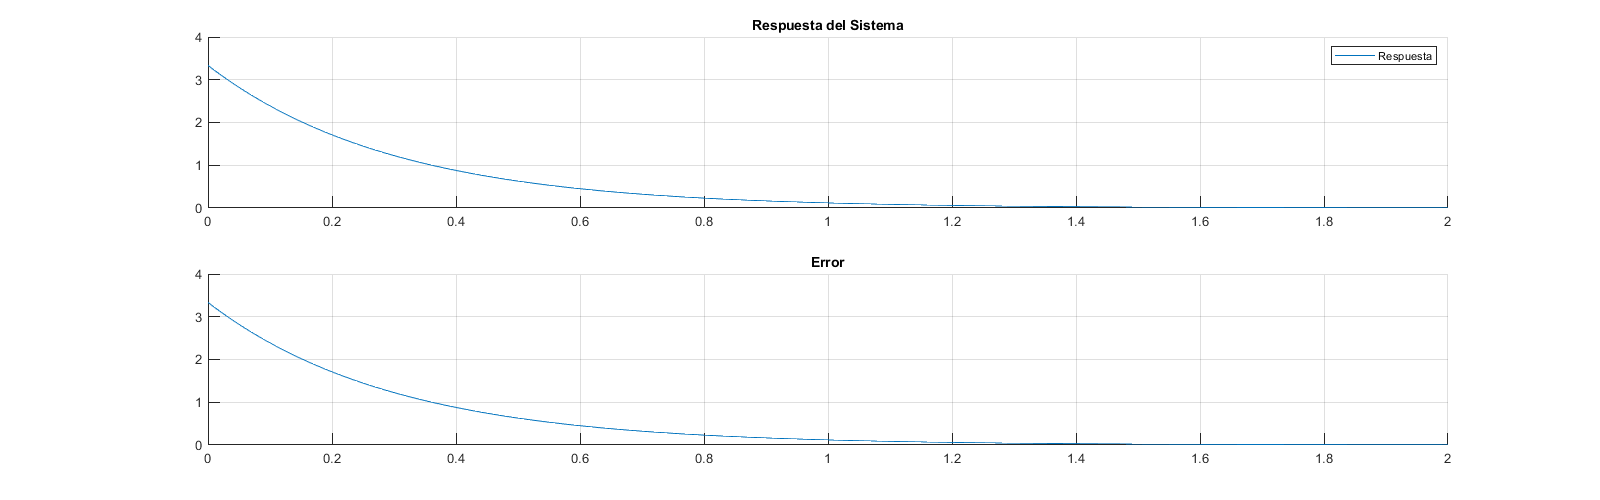

In [20]:
s = tf("s");
sistema = 1 / (0.3*s + 1);
tiempo = 0:0.01:2;

respuesta = impulse(sistema, tiempo);

figure;

ax = subplot(2,1,1);
hold(ax, 'on')

plot(ax, tiempo, transpose(respuesta))

legend('Respuesta')
title("Respuesta del Sistema")
grid on

ax = subplot(2,1,2);
hold(ax, 'on')

plot(tiempo, respuesta)

title("Error")
grid on

## Flexibilidad de la entrada Impulso

La entrada impulso tiene la ventaja de ser una constante al usar la transformada de Laplace, esto tiene como consecuencia que puede utilizarse la función **``impulse``** para modelar cualquier entrada arbitaria al utilizar su transformada de Laplace

## Entrada Escalón

Transformada de Laplace

In [21]:
s = sym("s");
t = sym("t");
entrada = 1;
entrada_s = laplace(entrada, t, s)

entrada_s =
1/s



Error en estado estacionario

In [22]:
sistema = 1 / (0.3*s + 1);
salida = entrada_s*sistema;
error = simplify(s * (entrada_s - salida))

error =
(3*s)/(3*s + 10)



In [23]:
error_estacionario = limit(error, s, 0, 'right')

error_estacionario =
0



El sistema puede responder con un error nulo en estado estacionario, esto quiere decir que con el suficiente tiempo, el sistema tendrá el mismo valor de salida que el de referencia.

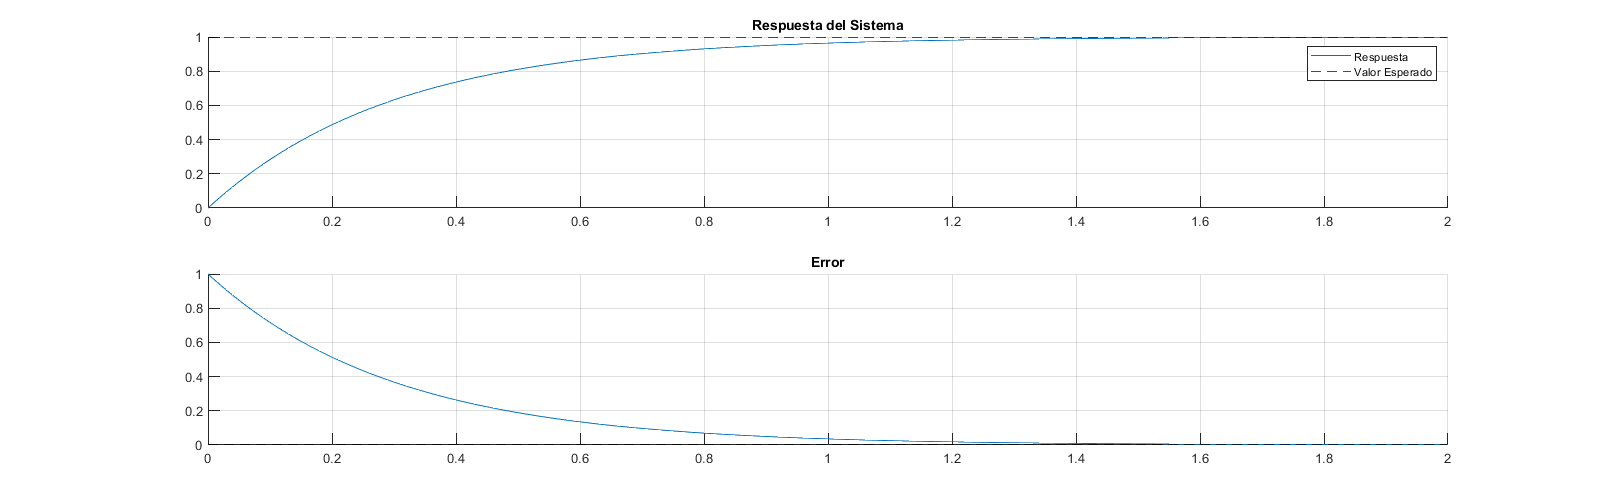

In [24]:
s = tf("s");
sistema = 1 / (0.3*s + 1);
tiempo = 0:0.01:2;

valor_esperado = 1;
entrada = valor_esperado / s;
respuesta = impulse(entrada*sistema, tiempo);

figure;

ax = subplot(2,1,1);
hold(ax, 'on')

plot(ax, tiempo, transpose(respuesta))

yline(ax, valor_esperado, "--k")
legend('Respuesta', 'Valor Esperado')
title("Respuesta del Sistema")
grid on

ax = subplot(2,1,2);
hold(ax, 'on')

plot(tiempo, valor_esperado - respuesta)

yline(0, "--k")
title("Error")
grid on

### Alternativa - Función **``step``**

En el caso particular de la función escalón, se puede utilizar la función **``step``** , sin necesidad de especificar la entrada

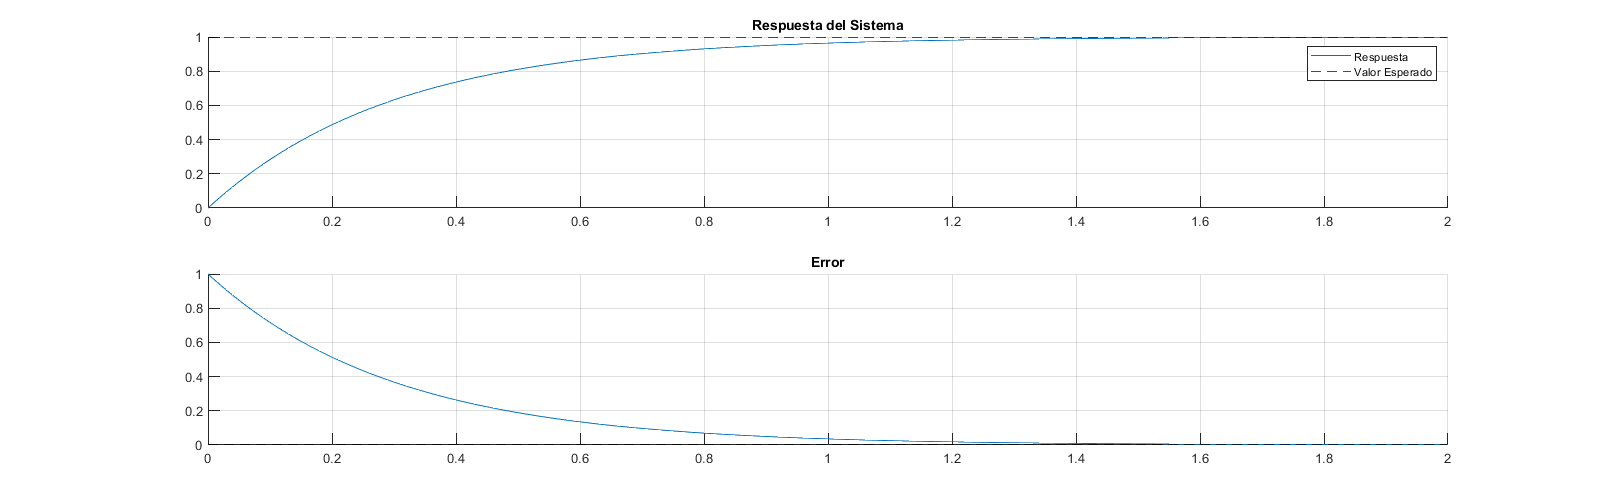

In [25]:
s = tf("s");
sistema = 1 / (0.3*s + 1);
tiempo = 0:0.01:2;

valor_esperado = 1;
respuesta = step(sistema, tiempo);

figure;

ax = subplot(2,1,1);
hold(ax, 'on')

plot(ax, tiempo, transpose(respuesta))

yline(ax, valor_esperado, "--k")
legend('Respuesta', 'Valor Esperado')
title("Respuesta del Sistema")
grid on

ax = subplot(2,1,2);
hold(ax, 'on')

plot(tiempo, valor_esperado - respuesta)

yline(0, "--k")
title("Error")
grid on

## Entrada Rampa

Transformada de Laplace

In [26]:
s = sym("s");
t = sym("t");
entrada = t;
entrada_s = laplace(entrada, t, s)

entrada_s =
1/s^2



Error en estado estacionario

In [27]:
sistema = 1 / (0.3*s + 1);
salida = entrada_s*sistema;
error = simplify(s * (entrada_s - salida))

error =
3/(3*s + 10)



In [28]:
error_estacionario = limit(error, s, 0, 'right')

error_estacionario =
0.3000



Al someter el sistema a una entrada rampa se tiene que el error en estado estacionario es $\frac{3}{10}$, esto es, un error constante a lo largo del tiempo.

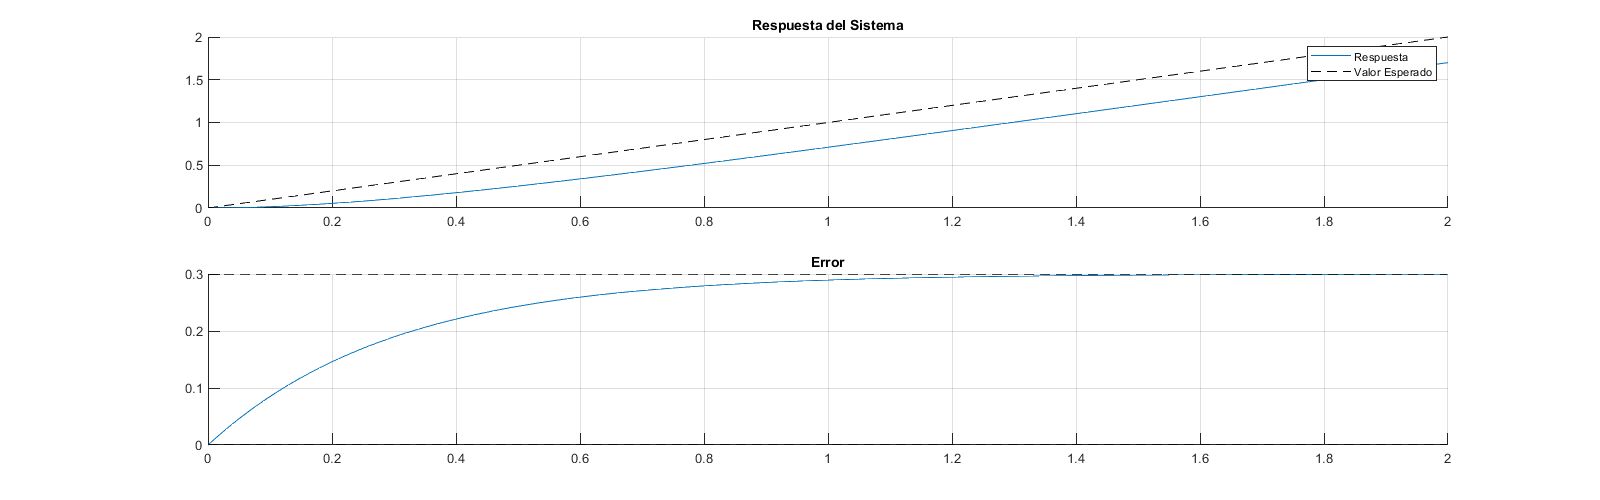

In [29]:
s = tf("s");
sistema = 1 / (0.3*s + 1);
tiempo = 0:0.01:2;

valor_esperado = tiempo;
entrada = 1 / s^2;
respuesta = impulse(entrada*sistema, tiempo);
respuesta = transpose(respuesta);

figure;

ax = subplot(2,1,1);
hold(ax, 'on')

plot(ax, tiempo, respuesta)
plot(ax, tiempo, valor_esperado, "--k")
legend('Respuesta', 'Valor Esperado')
grid on
title("Respuesta del Sistema")

ax = subplot(2,1,2);
hold(ax, 'on')
error = valor_esperado - respuesta;
plot(tiempo, error)
yline(error(end), "--k")
yline(0, "--k")
title("Error")
grid on

## Entrada Parabólica

Para una entrada parabólica se tiene

Transformada de Laplace

In [30]:
s = sym("s");
t = sym("t");
entrada = t^2;
entrada_s = laplace(entrada, t, s)

entrada_s =
2/s^3



Error en estado estacionario

In [31]:
sistema = 1 / (0.3*s + 1);
salida = entrada_s*sistema;
error = simplify(s * (entrada_s - salida))

error =
6/(s*(3*s + 10))



In [32]:
error_estacionario = limit(error, s, 0, 'right')

error_estacionario =
Inf



Se tiene entonces que este sistema tendrá un error en estado estacionario que se incrementa infinitamente.

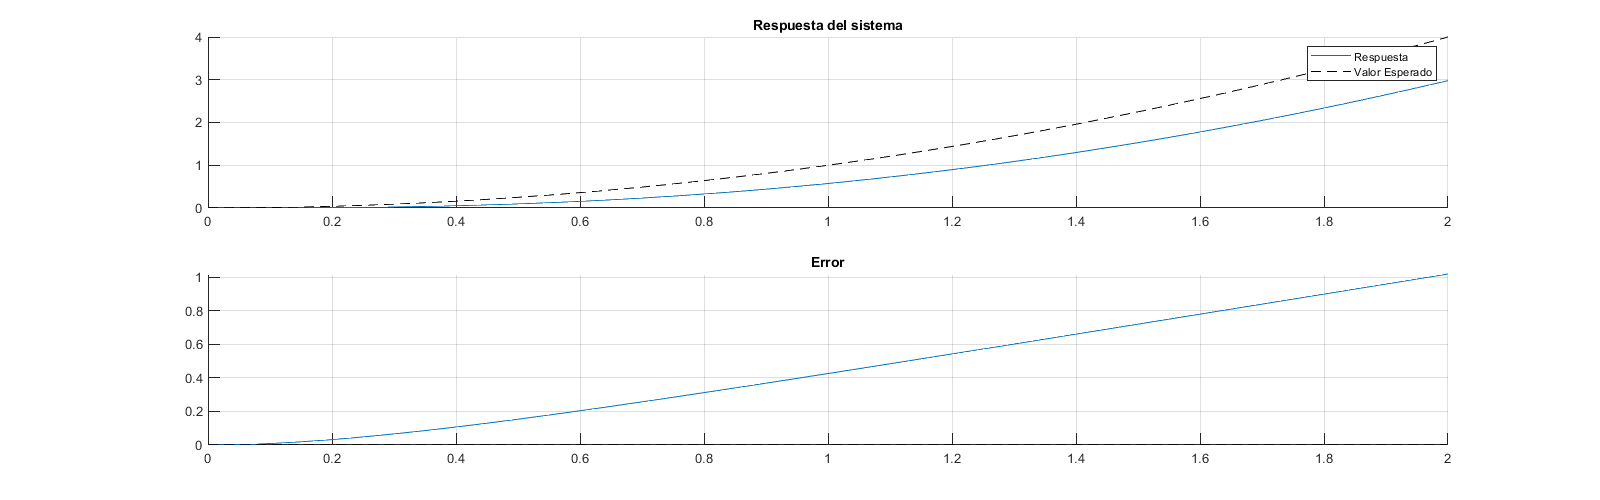

In [33]:
s = tf("s");
sistema = 1 / (0.3*s + 1);
tiempo = 0:0.01:2;

valor_esperado = tiempo .* tiempo;
entrada = 2 / s^3;
respuesta = impulse(entrada*sistema, tiempo);
respuesta = transpose(respuesta);

figure;

ax = subplot(2,1,1);
hold(ax, 'on')

plot(ax, tiempo, respuesta)
plot(ax, tiempo, valor_esperado, "--k")
legend('Respuesta', 'Valor Esperado')
title("Respuesta del sistema")
grid on

ax = subplot(2,1,2);
hold(ax, 'on')
plot(tiempo, valor_esperado - respuesta)
yline(0, "--k")
title("Error")
grid on

## Entradas Periódicas

Otro tipo de entrada para los sistemas es la entrada de tipo periódica, con las función **``gensig``** es posible generar esas entradas y luego se puede utilizar la función **``lsim``** para simular la salida

### Onda Cuadrada

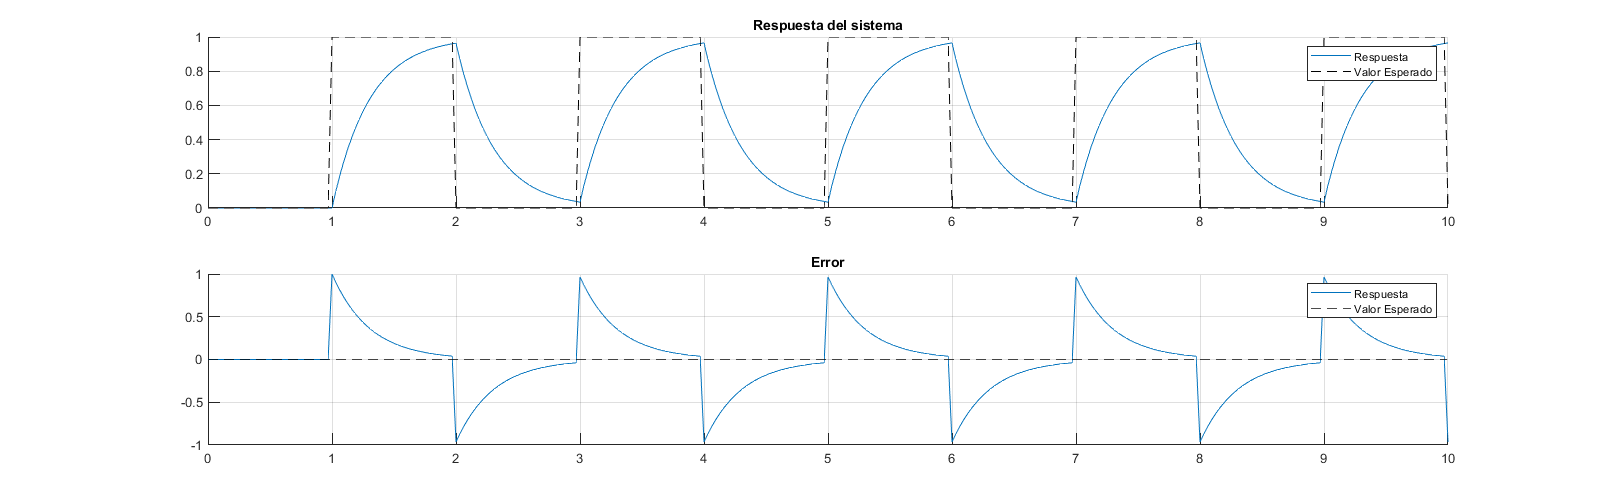

In [34]:
s = tf("s");
sistema = 1 / (0.3*s + 1);

periodo = 2;
[referencia, tiempo] = gensig("square", periodo);
respuesta = lsim(sistema, referencia, tiempo);

figure;

ax = subplot(2,1,1);
hold(ax, 'on')

plot(ax, tiempo, respuesta)
plot(ax, tiempo, referencia, "--k")
legend('Respuesta', 'Valor Esperado')
title("Respuesta del sistema")
grid on

ax = subplot(2,1,2);
hold(ax, 'on')
plot(tiempo, referencia - respuesta)
yline(0, "--k")
legend('Respuesta', 'Valor Esperado')
title("Error")
grid on

### Onda Senoidal

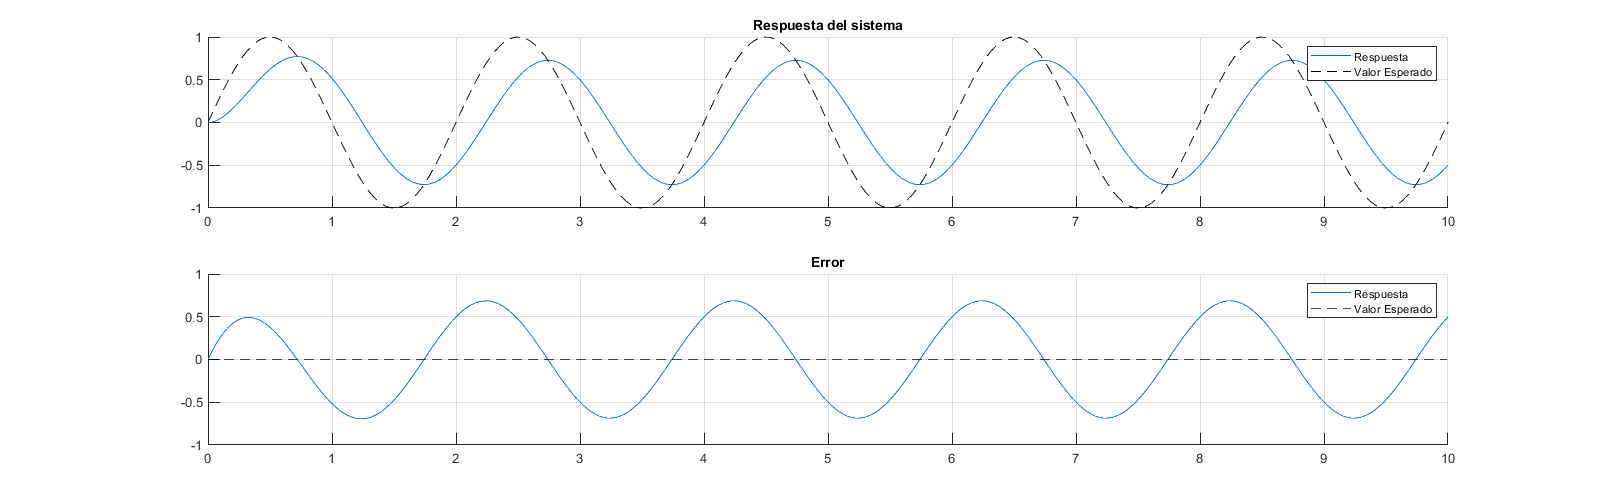

In [35]:
s = tf("s");
sistema = 1 / (0.3*s + 1);

periodo = 2;
[referencia, tiempo] = gensig("sine", periodo);
respuesta = lsim(sistema, referencia, tiempo);

figure;

ax = subplot(2,1,1);
hold(ax, 'on')

plot(ax, tiempo, respuesta)
plot(ax, tiempo, referencia, "--k")
legend('Respuesta', 'Valor Esperado')
title("Respuesta del sistema")
grid on

ax = subplot(2,1,2);
hold(ax, 'on')
plot(tiempo, referencia - respuesta)
yline(0, "--k")
legend('Respuesta', 'Valor Esperado')
title("Error")
grid on

### Pulsos Periódicos

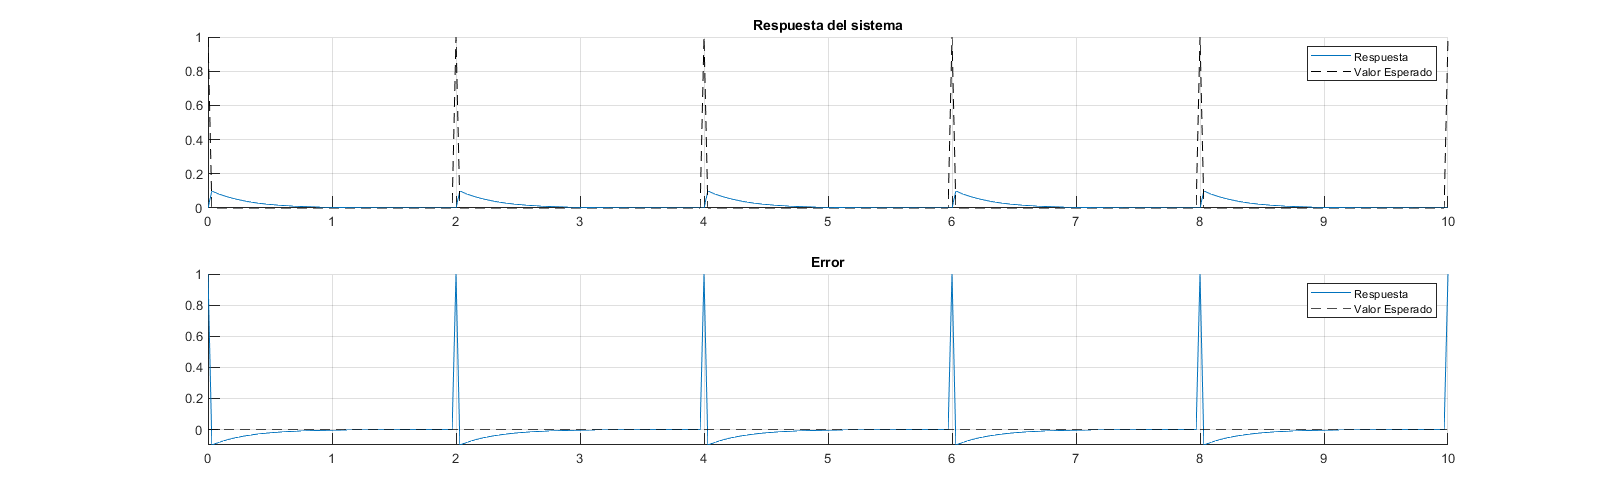

In [36]:
s = tf("s");
sistema = 1 / (0.3*s + 1);

periodo = 2;
[referencia, tiempo] = gensig("pulse", periodo);
respuesta = lsim(sistema, referencia, tiempo);

figure;

ax = subplot(2,1,1);
hold(ax, 'on')

plot(ax, tiempo, respuesta)
plot(ax, tiempo, referencia, "--k")
legend('Respuesta', 'Valor Esperado')
title("Respuesta del sistema")
grid on

ax = subplot(2,1,2);
hold(ax, 'on')
plot(tiempo, referencia - respuesta)
yline(0, "--k")
legend('Respuesta', 'Valor Esperado')
title("Error")
grid on